<a href="https://colab.research.google.com/github/Cullen-hub/DataScience_Python_Course/blob/main/Intro_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("walekhwatlphilip/intro-to-data-cleaning-eda-and-machine-learning")

print("Path to dataset files:", path)


100%|██████████| 9.73k/9.73k [00:00<00:00, 10.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/walekhwatlphilip/intro-to-data-cleaning-eda-and-machine-learning/versions/346


Access The Data
- Check its encoding (encoding detection works on raw bytes so used 'rb', read bytes)

In [6]:
import charset_normalizer as cn

In [7]:
with open(path + '/bi.csv', 'rb') as rawdata:
    result = cn.detect(rawdata.read(1000))['encoding']
    print(result)
df = pd.read_csv(path + '/bi.csv', encoding = result)
df.head()

hp_roman8


,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


Check The Data Type Of The Columns

In [8]:
df.apply(lambda x: x.dtypes)

,0
fNAME,object
lNAME,object
Age,int64
gender,object
country,object
residence,object
entryEXAM,int64
prevEducation,object
studyHOURS,int64
Python,float64


I notice that all the columns datatypes seem to make sense.
lets check that all elements in the columns with object are the same type.

In [9]:
Series = df['fNAME'].apply(type).groupby(df['fNAME'].apply(type)).count()
print(Series)

fNAME
<class 'str'>    77
Name: fNAME, dtype: int64


In [10]:
Series = df['lNAME'].apply(type).groupby(df['lNAME'].apply(type)).count()
print(Series)

lNAME
<class 'str'>    77
Name: lNAME, dtype: int64


In [11]:
Series = df['gender'].apply(type).groupby(df['gender'].apply(type)).count()
print(Series)

gender
<class 'str'>    77
Name: gender, dtype: int64


In [12]:
Series = df['country'].apply(type).groupby(df['country'].apply(type)).count()
print(Series)

country
<class 'str'>    77
Name: country, dtype: int64


In [13]:
Series = df['residence'].apply(type).groupby(df['residence'].apply(type)).groups
print(Series)

rest = Series[str]
df2 = df.loc[rest, 'residence']
print(df2)


{<class 'str'>: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]}
0       Private
1       Private
2     Sognsvann
3     Sognsvann
4     Sognsvann
        ...    
72      Private
73    Sognsvann
74    Sognsvann
75    Sognsvann
76    Sognsvann
Name: residence, Length: 77, dtype: object


In [14]:
Series = df['prevEducation'].apply(type).groupby(df['prevEducation'].apply(type)).count()
print(Series)

prevEducation
<class 'str'>    77
Name: prevEducation, dtype: int64


In [15]:
df.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,75.000000,77.000000
mean,35.207792,76.753247,149.714286,75.853333,69.467532
std,10.341966,16.475784,12.743272,15.410328,17.033701
min,21.000000,28.000000,114.000000,15.000000,30.000000
25%,27.000000,69.000000,144.000000,71.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


In [16]:
print(df.columns)
Columns = df.columns

Index(['fNAME', 'lNAME', 'Age', 'gender', 'country', 'residence', 'entryEXAM',
       'prevEducation', 'studyHOURS', 'Python', 'DB'],
      dtype='object')


In [17]:
mapping = {'fNAME' : 'FirstName', 'lNAME': 'LastName', 'gender': 'Gender', 'country': 'Country', 'residence': 'Residence', 'entryEXAM': 'EntryExam', 'prevEducation': 'PrevEducation', 'studyHOURS': 'StudyHours'}

In [18]:
df.rename(columns = mapping, inplace = True)
df.head()

,FirstName,LastName,Age,Gender,Country,Residence,EntryExam,PrevEducation,StudyHours,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


In [19]:
df.isnull().sum()
df.loc[df.isnull()['Python']]

,FirstName,LastName,Age,Gender,Country,Residence,EntryExam,PrevEducation,StudyHours,Python,DB
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
33,Frank,Abrahamsen,23,Male,Norway,BI Residence,68,High School,152,NaN,70


In [44]:
median = df['Python'].median()
print(median)
df['Python'].fillna(median, inplace = True)
df.isnull().sum()

81.0


/tmp/ipython-input-2422822073.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Python'].fillna(median, inplace = True)


,0
FirstName,0
LastName,0
Age,0
Gender,0
Country,0
Residence,0
EntryExam,0
PrevEducation,0
StudyHours,0
Python,0


In [45]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [46]:
mapping = {'Female': 'F', 'Male': 'M', 'female': 'F', 'male': 'M', 'M':'M', 'F':'F'}
df['Gender'] = df['Gender'].apply(lambda x: mapping[x])
df.head()

,FirstName,LastName,Age,Gender,Country,Residence,EntryExam,PrevEducation,StudyHours,Python,DB
0,Christina,Binger,44,F,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,M,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,South Africa,Sognsvann,40,HighSchool,120,81.0,44
4,Maria,Kedibone,23,F,South Africa,Sognsvann,65,HighSchool,122,91.0,80


In [47]:
df['Country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'South Africa', 'Denmark',
       'Netherlands', 'Italy', 'Spain', 'UK', 'Somalia', 'Nigeria',
       'Germany', 'France'], dtype=object)

In [48]:
mapping = {'norway':'Norway', 'Rsa': 'South Africa', 'Norge': 'Norway', 'Norway' : 'Norway', 'Kenya': 'Kenya', 'Uganda' : 'Uganda', 'South Africa' : 'South Africa', 'Denmark' : 'Denmark', 'Netherlands' : 'Netherlands', 'Italy' : 'Italy', 'Spain' : 'Spain', 'UK' : 'UK',
       'Somali' : 'Somalia', 'Nigeria' : 'Nigeria', 'Germany' : 'Germany', 'France' : 'France'}
df['Country'] = df['Country'].map(mapping)
df.head()

,FirstName,LastName,Age,Gender,Country,Residence,EntryExam,PrevEducation,StudyHours,Python,DB
0,Christina,Binger,44,F,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,M,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,South Africa,Sognsvann,40,HighSchool,120,81.0,44
4,Maria,Kedibone,23,F,South Africa,Sognsvann,65,HighSchool,122,91.0,80


In [24]:
df['Residence'].unique()

array(['Private', 'Sognsvann', 'BI Residence', 'BI-Residence',
       'BIResidence', 'BI_Residence'], dtype=object)

In [25]:
mapping = {'BI Residence': 'BI_Residence', 'BIResidence': 'BI_Residence', 'BI-Residence': 'BI_Residence', 'BI_Residence': 'BI_Residence', 'Private':'Private', 'Sognsvann' : 'Sognsvann'}

In [26]:
df['Residence'] = df['Residence'].map(mapping)
df.head()

,FirstName,LastName,Age,Gender,Country,Residence,EntryExam,PrevEducation,StudyHours,Python,DB
0,Christina,Binger,44,F,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,M,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,South Africa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,F,South Africa,Sognsvann,65,High School,122,91.0,80


In [27]:
df['Residence'].unique()

array(['Private', 'Sognsvann', 'BI_Residence'], dtype=object)

In [28]:
df['PrevEducation'].unique()

array(['Masters', 'Diploma', 'HighSchool', 'High School', 'Bachelors',
       'Barrrchelors', 'diploma', 'DIPLOMA', 'Diplomaaa', 'Doctorate'],
      dtype=object)

In [29]:
mapping = {'High School': 'HighSchool', 'Barrrchelors': 'Bachelors', 'diploma': 'Diploma', 'DIPLOMA': 'Diploma', 'Diplomaaa': 'Diploma'}

In [31]:
df['PrevEducation'] = df['PrevEducation'].replace(mapping)
df.head()

,FirstName,LastName,Age,Gender,Country,Residence,EntryExam,PrevEducation,StudyHours,Python,DB
0,Christina,Binger,44,F,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,M,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,South Africa,Sognsvann,40,HighSchool,120,NaN,44
4,Maria,Kedibone,23,F,South Africa,Sognsvann,65,HighSchool,122,91.0,80


In [33]:
df.shape

(77, 11)

In [53]:
df2 = df.duplicated(subset = ['FirstName', 'LastName']).sum()
print(df2)

0


In [57]:
numerics = df.select_dtypes(include = 'number')
numerics.corr()

,Age,EntryExam,StudyHours,Python,DB
Age,1.000000,0.131427,0.214712,-0.025214,0.099454
EntryExam,0.131427,1.000000,0.807851,0.745876,0.608464
StudyHours,0.214712,0.807851,1.000000,0.772933,0.466043
Python,-0.025214,0.745876,0.772933,1.000000,0.435496
DB,0.099454,0.608464,0.466043,0.435496,1.000000


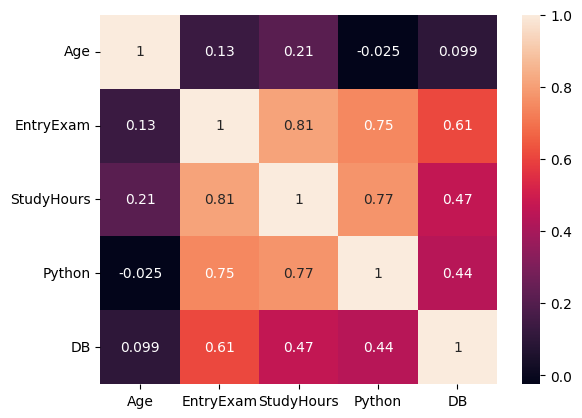

In [58]:
ax = sns.heatmap(numerics.corr(), annot = True)

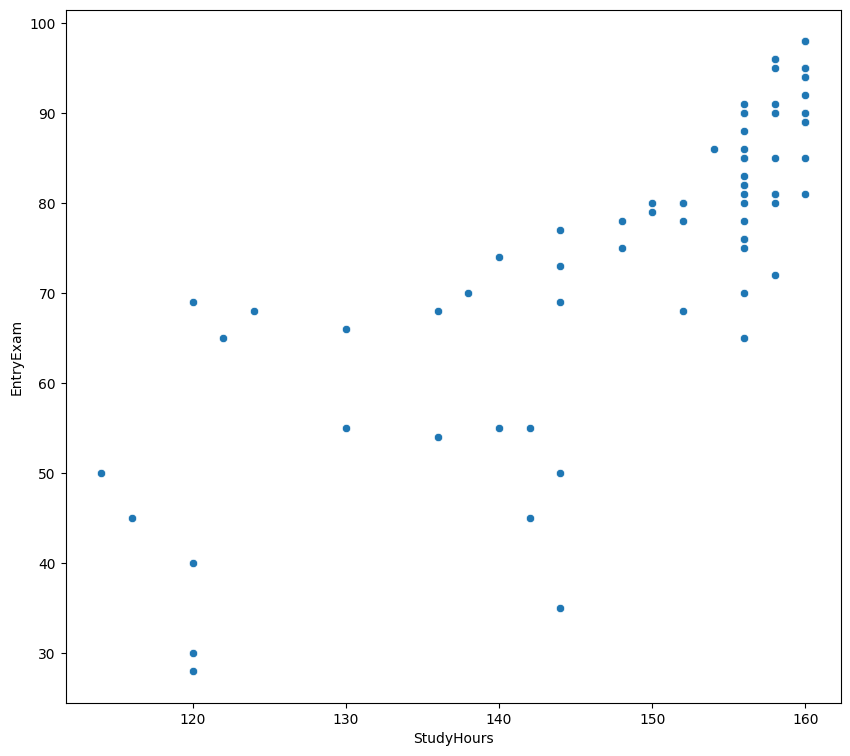

In [63]:
sns.scatterplot(data = df, x = 'StudyHours', y = 'EntryExam')
plt.rcParams['figure.figsize'] = (10,9)
plt.show()

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [70]:
x = df[['StudyHours']]
y = df[['EntryExam']]
#random_state = 42 just set a seed so that everytime you run the code you get the same rows split as train_test_split shuffles the data before splitting.
#you can use any integer but the convention is to use 42
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x,y,test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_Train, Y_Train)
Y_Predict = model.predict(X_Test)
print('Mean Squared Error - ',mean_squared_error(Y_Test, Y_Predict))
print('R Squared - ', r2_score(Y_Test, Y_Predict))


Mean Squared Error -  102.28698388645564
R Squared -  0.6663379009042847


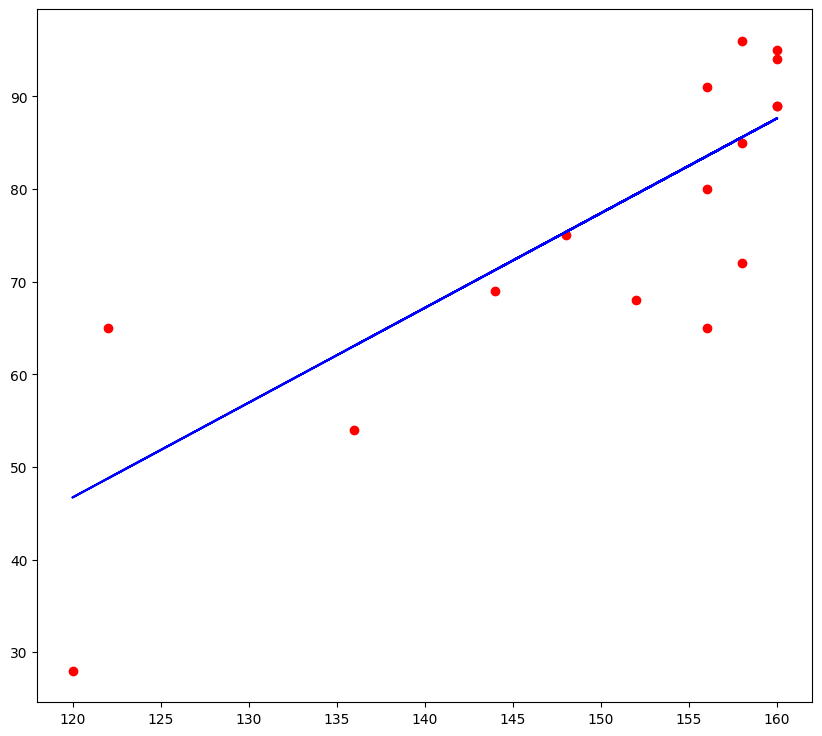

In [72]:
plt.scatter(X_Test, Y_Test, color = 'red')
plt.plot(X_Test,Y_Predict, color = 'blue')
plt.show()